158


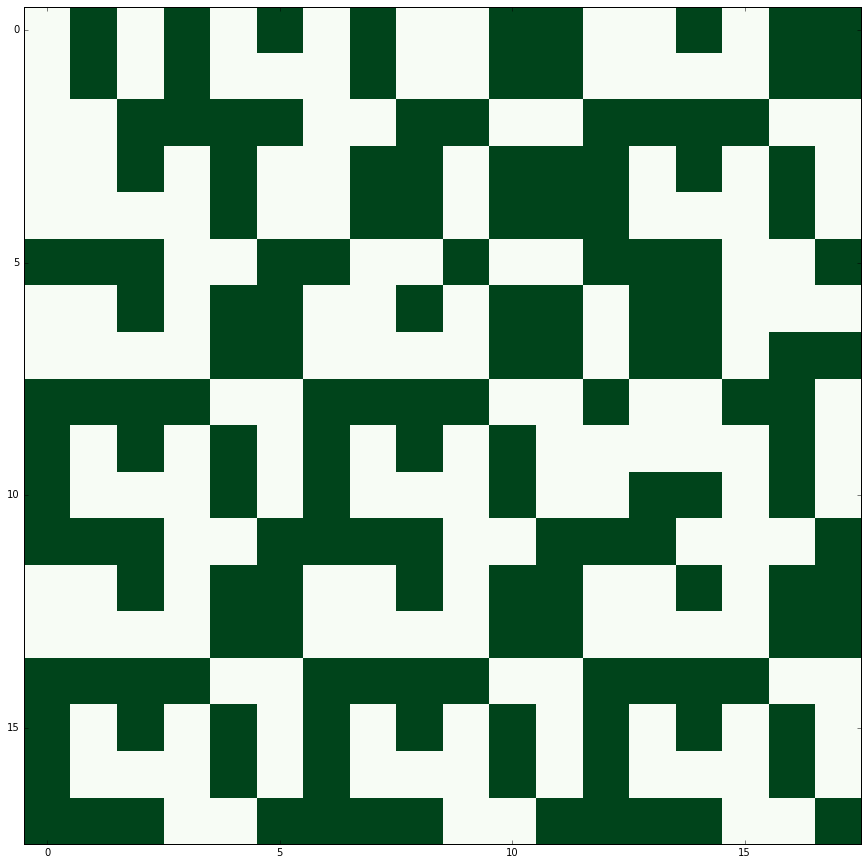

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import data
import numpy as np

def parse_part(part):
    # Parse a part of a rule
    return np.array([[c for c in line] for line in part.split('/')])

def parse_rule(rule):
    a, b = rule.split(' => ')
    a, b = parse_part(a), parse_part(b)
    a = get_variants(a)
    return a, b

def get_variants(part):
    variants = []
    mirror = np.flip(part, axis=0)
    for i in range(4):
        variants.append(np.rot90(part, k=i))
        variants.append(np.rot90(mirror, k=i))
    variants = np.unique(variants, axis=0)
    return variants

class Fractal:
    def __init__(self, rules):
        pattern = [[c for c in line] for line in data.start.split('\n')]
        self.pattern = np.array(pattern)
        self.parse_rules(rules)
        
    def parse_rules(self, rules):
        self.rules = {}
        for rule in rules.split('\n'):
            froms, to = parse_rule(rule)
            for f in froms:
                self.rules[f.tostring()] = to
        
    def operate(self):
        grid_size = int(self.grid_size())
        from_section_size = self.section_size()
        next_section_size = 4 if from_section_size == 3 else 3
        next_grid_size = self.next_grid_size()
        out = np.empty((next_grid_size, next_grid_size), dtype='U1')
        
        for i in range(0, int(grid_size/from_section_size)):
            for j in range(0, int(grid_size/from_section_size)):
                i_f = i * from_section_size # i from
                j_f = j * from_section_size # j frmo 
                prev = self.pattern[i_f:i_f+from_section_size, j_f:j_f+from_section_size]
                sp = prev.tostring()
                nxt = self.rules[sp]
                i_n = i * next_section_size # i next
                j_n = j * next_section_size # j next
                out[i_n:i_n+next_section_size, j_n:j_n+next_section_size] = nxt
                
        self.pattern = out
    
    def section_size(self):
        if self.grid_size() % 2 == 0:
            return 2
        else:
            return 3
    
    def sections(self):
        return self.grid_size()/self.section_size()
    
    def grid_size(self):
        return self.pattern.shape[0]
    
    def next_grid_size(self):
        ss = self.section_size()
        sects = self.sections()
        
        if ss == 2:
            return int(sects * 3)
        else:
            return int(sects * 4)
        
    def pixels_on(self):
        return (self.pattern=='#').sum()
        
    def __str__(self):
        return str(self.pattern)
    
    def plot(self):
        plottable = self.pattern == '#'
        plt.figure(figsize=(15, 15))
        plt.imshow(plottable, cmap='Greens', interpolation='nearest')

f = Fractal(data.test_data)

f.operate()
f.operate()

assert f.pixels_on() == 12

f = Fractal(data.data)

for i in range(5):
    f.operate()

print(f.pixels_on())
f.plot()

2301762


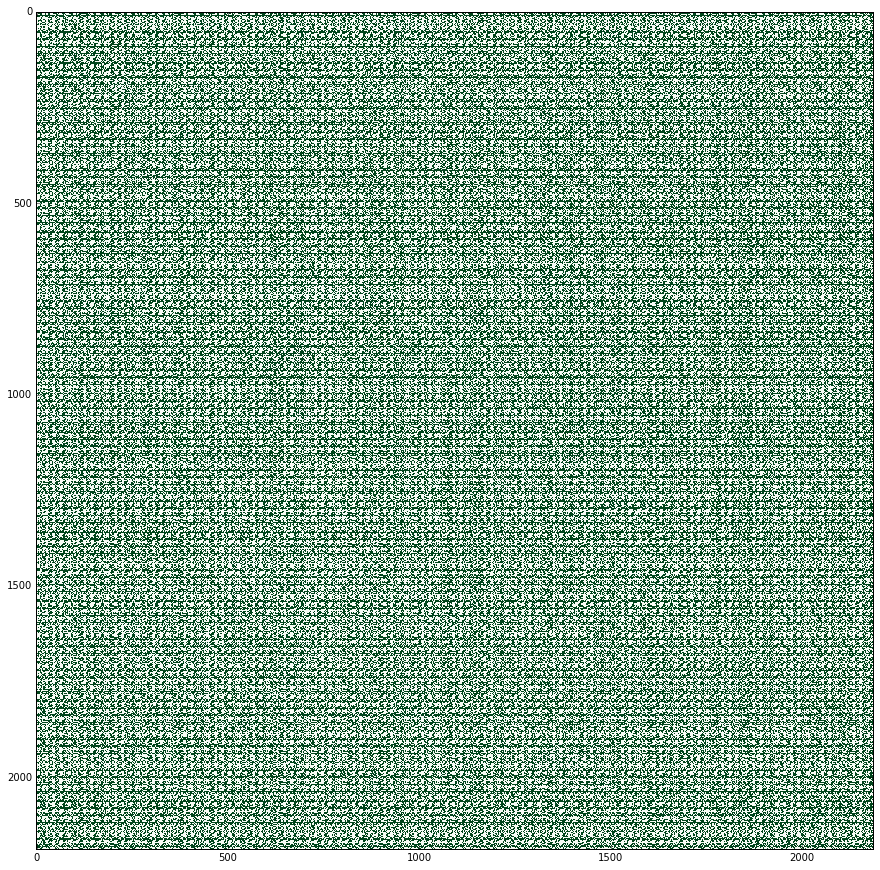

In [2]:
f = Fractal(data.data)
for i in range(18):
    f.operate()
    
print(f.pixels_on())
f.plot()